In [5]:
from statistics import mean
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import random

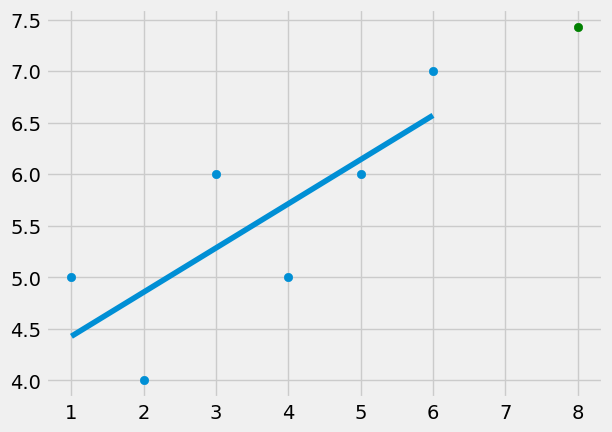

In [3]:
# to predict values given an input, an equation of the graph can be used
# regression is all about figuring out the constants
# for example finding the m and b in y= mx + b, which would make it very easy to return any points given an x / input since the model has been trained (equaiton of line already found)
style.use('fivethirtyeight')

xs = np.array([1,2,3,4,5,6], dtype=np.float64)
ys = np.array([5,4,6,5,6,7], dtype=np.float64)

# slope = (mean of xs * mean of ys - mean of xs*ys) / (mean(xs)^2 - mean(xs^2))
# y-intercept = mean of ys - slope * mean of xs
def best_fit_slope_and_intercept(xs, ys):
    m = ((mean(xs) * mean(ys) - mean(xs * ys))/
         (mean(xs)**2 - mean(xs**2)))
    b = mean(ys) - m * mean(xs)
    return m, b

m,b = best_fit_slope_and_intercept(xs, ys)

regression_line = [m*x+b for x in xs]

predict_x = 8
predict_y = (m*predict_x)+b

plt.scatter(xs, ys)
plt.scatter(predict_x, predict_y, color='g')
plt.plot(xs, regression_line)
plt.show()

In [4]:
# R squared - determines how accurate a model is
# R is distance between line of best fit and points. It is squared to only have positive numbers
# However R squared algorithm can be used for much more than just simple regression

# R^2 = 1 - (Squared error of regression line / Squared error of mean Ys)
# Essentially, compares best fit line to a constant function with y = mean of Ys
# Want R^2 value to be as high as possible

def squared_error(ys_orig, ys_line):
    return sum((ys_line-ys_orig)**2)

def coefficient_of_determination(ys_orig, ys_line):
    y_mean_line = [mean(ys_orig) for y in ys_orig]
    squared_error_regr = squared_error(ys_orig, ys_line)
    squared_error_y_mean = squared_error(ys_orig, y_mean_line)
    return 1 - (squared_error_regr/squared_error_y_mean)

r_squared = coefficient_of_determination(ys, regression_line)
print(r_squared)

0.5844155844155845


0.3380897144126116


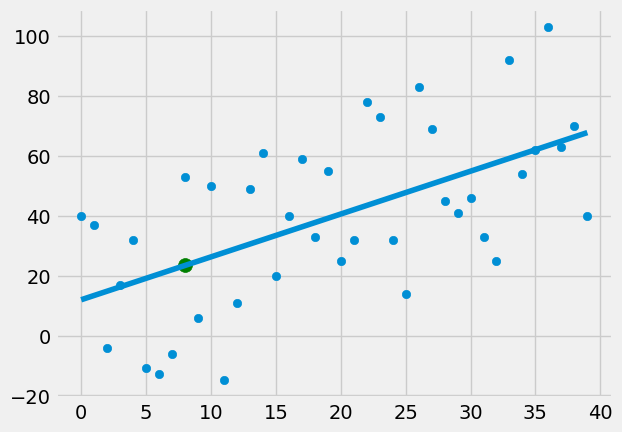

In [17]:
def create_dataset(hm, variance, step=2, correlation=False):
    val = 1
    ys = []
    for i in range(hm):
        y = val + random.randrange(-variance, variance)
        ys.append(y)
        if correlation and correlation == 'pos':
            val+=step
        elif correlation and correlation == 'neg':
            val -= step
    xs = [i for i in range(len(ys))]

    return np.array(xs, dtype=np.float64), np.array(ys, dtype=np.float64)

xs, ys = create_dataset(40,40,2, correlation='pos')

m,b = best_fit_slope_and_intercept(xs, ys)

regression_line = [m*x+b for x in xs]

predict_x = 8
predict_y = (m*predict_x)+b

r_squared = coefficient_of_determination(ys, regression_line)
print(r_squared)

plt.scatter(xs, ys)
plt.scatter(predict_x, predict_y, s=100, color='g')
plt.plot(xs, regression_line)
plt.show()